In [ ]:
import IPython.display as ipd
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install llvmlite==0.31.0
!pip install resampy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for llvmlite
  Running setup.py clean for llvmlite
Failed to build llvmlite
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  error: subprocess-exited-with-error
  
  × Running setup.py install for llvmlite did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for 

In [ ]:
def extract_features(file):
    f=[]
    g=[]
    for files in os.listdir(file):
        folder=file+str('/')+str(files)

        for fil in os.listdir(folder):
            file_name=folder+str('/')+str(fil)

            if file_name.endswith('flac'):
               X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

               mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
               
               stft = np.abs(librosa.stft(X))
               
               chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

               contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
               
               tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)

               mfcc = ((mfccs-mfccs.min())/(mfccs.max()-mfccs.min()))
               chrom = ((chroma-chroma.min())/(chroma.max()-chroma.min()))
               contras = ((contrast-contrast.min())/(contrast.max()-contrast.min()))
               tonn = ((tonnetz-tonnetz.min())/(tonnetz.max()-tonnetz.min()))

               features=[]
               for i in mfcc:
                 features.append(i)

               for i in chrom:
                 features.append(i)
               
               for i in contras:
                 features.append(i)

               for i in tonn:
                 features.append(i)
             
               g.append(str(folder)[33:])
               f.append(features)
            
    return f,g

In [ ]:
f,g=extract_features('/content/drive/MyDrive/Mars/LibriSpeech-20230312T054611Z-001 - Copy/LibriSpeech/dev-clean')
vzz=pd.DataFrame(f)
vzz



/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=965
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=634
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=583
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=724
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=905
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=908
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWar

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,1.0,0.711024,0.840036,0.768485,0.776394,0.709285,0.718214,0.751658,0.762306,...,0.007779,0.072499,0.064420,1.0,0.000000,0.672034,0.669256,1.000000,0.434807,0.257326
1,0.0,1.0,0.634719,0.784874,0.709879,0.723067,0.667506,0.648095,0.691047,0.708268,...,0.006370,0.073388,0.089257,1.0,0.268222,0.914403,0.000000,1.000000,0.489583,0.450565
2,0.0,1.0,0.619271,0.789147,0.715421,0.713483,0.653233,0.634427,0.682474,0.711609,...,0.022653,0.087051,0.100778,1.0,0.259055,0.287338,0.561053,1.000000,0.179578,0.000000
3,0.0,1.0,0.695137,0.852616,0.762661,0.757961,0.687362,0.686264,0.741630,0.753701,...,0.009321,0.084729,0.087678,1.0,0.172101,0.254679,0.425530,1.000000,0.222950,0.000000
4,0.0,1.0,0.639737,0.788866,0.722372,0.708800,0.658632,0.652572,0.701844,0.719420,...,0.001416,0.064443,0.076573,1.0,0.257205,0.145254,0.011572,1.000000,0.000000,0.092535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,0.0,1.0,0.682712,0.809911,0.754286,0.751127,0.751510,0.732391,0.753411,0.773230,...,0.009594,0.049119,0.111067,1.0,0.704380,0.922675,1.000000,0.000000,0.872260,0.708601
1741,0.0,1.0,0.745332,0.843360,0.782146,0.777466,0.793735,0.781083,0.797577,0.808738,...,0.037108,0.067083,0.139837,1.0,0.921724,0.145569,0.054289,0.000000,0.659680,1.000000
1742,0.0,1.0,0.562923,0.857192,0.649233,0.759434,0.666623,0.720880,0.721128,0.711255,...,0.002425,0.047723,0.123612,1.0,0.555514,0.824251,0.000000,0.591946,1.000000,0.842193
1743,0.0,1.0,0.628160,0.894183,0.690755,0.787827,0.712249,0.731597,0.747970,0.740006,...,0.000000,0.036388,0.138217,1.0,0.268988,0.843422,0.000000,0.798401,1.000000,0.482529


In [ ]:
vzz

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,1.0,0.711024,0.840036,0.768485,0.776394,0.709285,0.718214,0.751658,0.762306,...,0.007779,0.072499,0.064420,1.0,0.000000,0.672034,0.669256,1.000000,0.434807,0.257326
1,0.0,1.0,0.634719,0.784874,0.709879,0.723067,0.667506,0.648095,0.691047,0.708268,...,0.006370,0.073388,0.089257,1.0,0.268222,0.914403,0.000000,1.000000,0.489583,0.450565
2,0.0,1.0,0.619271,0.789147,0.715421,0.713483,0.653233,0.634427,0.682474,0.711609,...,0.022653,0.087051,0.100778,1.0,0.259055,0.287338,0.561053,1.000000,0.179578,0.000000
3,0.0,1.0,0.695137,0.852616,0.762661,0.757961,0.687362,0.686264,0.741630,0.753701,...,0.009321,0.084729,0.087678,1.0,0.172101,0.254679,0.425530,1.000000,0.222950,0.000000
4,0.0,1.0,0.639737,0.788866,0.722372,0.708800,0.658632,0.652572,0.701844,0.719420,...,0.001416,0.064443,0.076573,1.0,0.257205,0.145254,0.011572,1.000000,0.000000,0.092535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,0.0,1.0,0.682712,0.809911,0.754286,0.751127,0.751510,0.732391,0.753411,0.773230,...,0.009594,0.049119,0.111067,1.0,0.704380,0.922675,1.000000,0.000000,0.872260,0.708601
1741,0.0,1.0,0.745332,0.843360,0.782146,0.777466,0.793735,0.781083,0.797577,0.808738,...,0.037108,0.067083,0.139837,1.0,0.921724,0.145569,0.054289,0.000000,0.659680,1.000000
1742,0.0,1.0,0.562923,0.857192,0.649233,0.759434,0.666623,0.720880,0.721128,0.711255,...,0.002425,0.047723,0.123612,1.0,0.555514,0.824251,0.000000,0.591946,1.000000,0.842193
1743,0.0,1.0,0.628160,0.894183,0.690755,0.787827,0.712249,0.731597,0.747970,0.740006,...,0.000000,0.036388,0.138217,1.0,0.268988,0.843422,0.000000,0.798401,1.000000,0.482529


In [ ]:
vzz.to_csv('file2.csv', header=False, index=False)

In [ ]:
gg=pd.DataFrame(g)
gg.shape


(1745, 1)

In [ ]:
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(gg))
yy=pd.DataFrame(y)
yy
#yz=yy.drop(yy.columns[0], axis=1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
yy.shape


(1745, 33)

In [ ]:
vzz.shape

(1745, 65)

In [ ]:

X_trainn, X_test, y_trainn, y_test = train_test_split(vzz, yy, random_state=42, test_size=0.1)
X_train, X_val , y_train , y_val = train_test_split(X_trainn, y_trainn,random_state=42, test_size= 0.1)
 

In [ ]:
model = Sequential()

model.add(Dense(120, input_shape=(65,), activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))  


model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))    
model.add(Flatten())
model.add(Dense(33, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



In [ ]:
history = model.fit(X_train,y_train, epochs=300,
          validation_data = (X_val, y_val))
                    

Epoch 1/300
45/45 [==============================] - 2s 10ms/step - loss: 3.4887 - accuracy: 0.0396 - val_loss: 3.4275 - val_accuracy: 0.0701
Epoch 2/300
45/45 [==============================] - 0s 3ms/step - loss: 3.4141 - accuracy: 0.0672 - val_loss: 3.3265 - val_accuracy: 0.0828
Epoch 3/300
45/45 [==============================] - 0s 3ms/step - loss: 3.2806 - accuracy: 0.1125 - val_loss: 3.1212 - val_accuracy: 0.1338
Epoch 4/300
45/45 [==============================] - 0s 4ms/step - loss: 3.0956 - accuracy: 0.1231 - val_loss: 2.8975 - val_accuracy: 0.1401
Epoch 5/300
45/45 [==============================] - 0s 4ms/step - loss: 2.9492 - accuracy: 0.1656 - val_loss: 2.7442 - val_accuracy: 0.1847
Epoch 6/300
45/45 [==============================] - 0s 3ms/step - loss: 2.8045 - accuracy: 0.1840 - val_loss: 2.5819 - val_accuracy: 0.2548
Epoch 7/300
45/45 [==============================] - 0s 3ms/step - loss: 2.6589 - accuracy: 0.2144 - val_loss: 2.3841 - val_accuracy: 0.2611
Epoch 8/300


In [ ]:
import matplotlib.pyplot as plt
#%matplotlib inline

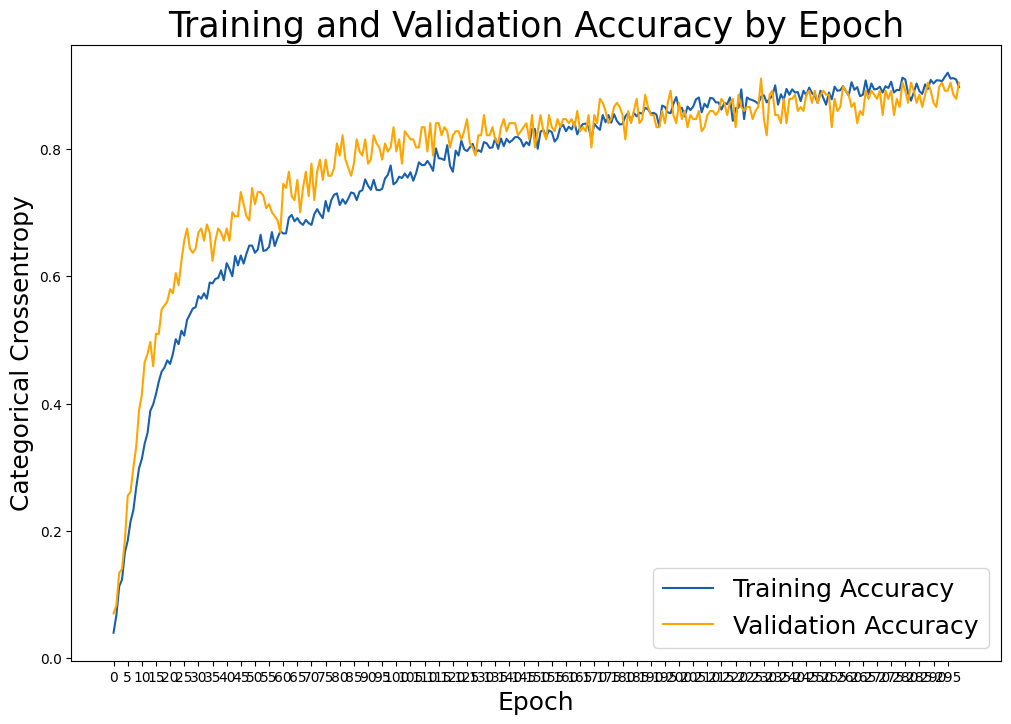

In [ ]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,300,5), range(0,300,5))

plt.legend(fontsize = 18);


In [ ]:
history = model.fit(X_train,y_train, epochs=4,
          validation_data = (X_test, y_test ))

Epoch 1/4
45/45 [==============================] - 0s 7ms/step - loss: 0.2531 - accuracy: 0.9045 - val_loss: 0.6754 - val_accuracy: 0.8286
Epoch 2/4
45/45 [==============================] - 0s 5ms/step - loss: 0.2654 - accuracy: 0.9158 - val_loss: 0.6763 - val_accuracy: 0.8400
Epoch 3/4
45/45 [==============================] - 0s 5ms/step - loss: 0.3018 - accuracy: 0.9023 - val_loss: 0.7312 - val_accuracy: 0.8171
Epoch 4/4
45/45 [==============================] - 0s 5ms/step - loss: 0.2439 - accuracy: 0.9214 - val_loss: 0.6617 - val_accuracy: 0.8171


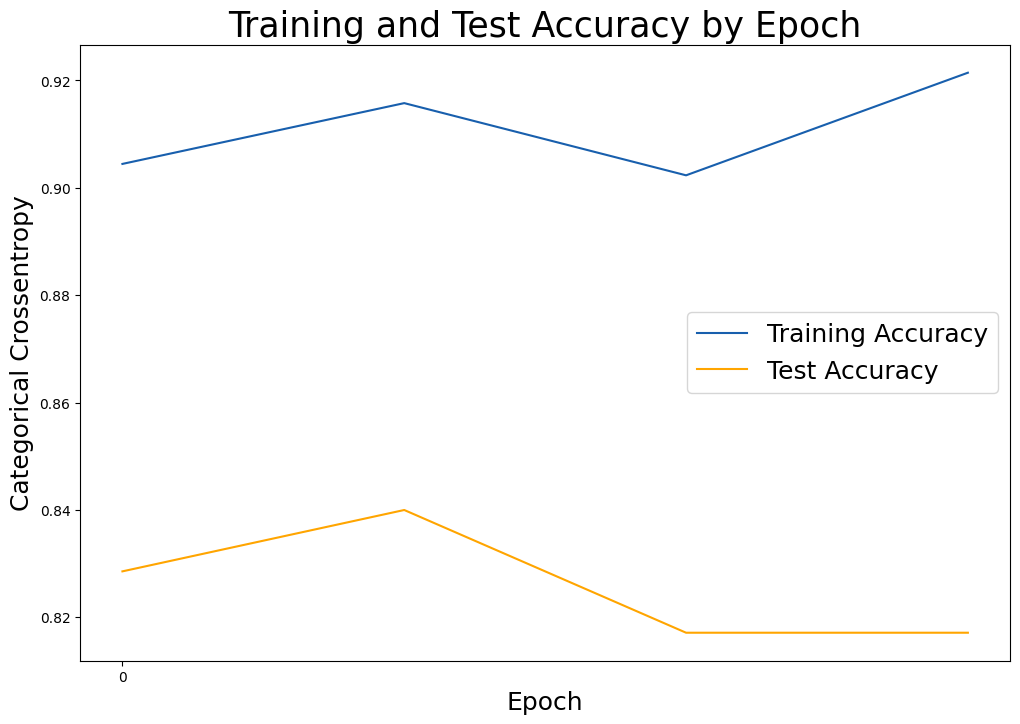

In [ ]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(test_accuracy, label='Test Accuracy', color='orange')

# Set title
plt.title('Training and Test Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,4,5), range(0,4,5))

plt.legend(fontsize = 18);


In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
365,0.0,1.0,0.722980,0.749505,0.733906,0.732538,0.685666,0.696022,0.705794,0.698370,...,0.007162,0.133839,0.084504,1.0,0.424181,0.306373,0.682981,0.000000,0.737672,1.000000
344,0.0,1.0,0.718009,0.742056,0.717481,0.727269,0.683942,0.696620,0.703327,0.695810,...,0.050444,0.117754,0.090118,1.0,0.000000,0.511805,0.001986,1.000000,0.302619,0.596953
1606,0.0,1.0,0.692147,0.820362,0.744736,0.791049,0.707888,0.704365,0.753258,0.757588,...,0.049259,0.182802,0.140582,1.0,0.284281,1.000000,0.599460,0.000000,0.253409,0.505220
70,0.0,1.0,0.728652,0.866073,0.769453,0.811422,0.757421,0.770814,0.772897,0.769066,...,0.030940,0.096049,0.080092,1.0,0.377101,0.541709,0.103781,0.000000,0.743616,1.000000
845,0.0,1.0,0.604990,0.725513,0.659151,0.689541,0.648540,0.657910,0.650723,0.669868,...,0.000000,0.076517,0.088589,1.0,0.423261,0.830078,0.000000,0.698970,1.000000,0.988718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,0.0,1.0,0.647504,0.816693,0.680726,0.711611,0.684518,0.672530,0.678901,0.677238,...,0.020573,0.049982,0.096133,1.0,1.000000,0.864341,0.117563,0.000000,0.982996,0.867676
210,0.0,1.0,0.690275,0.817257,0.740497,0.708730,0.729576,0.729511,0.713711,0.729098,...,0.054302,0.056332,0.212967,1.0,0.491053,0.865672,1.000000,0.830373,0.600936,0.000000
590,0.0,1.0,0.736500,0.803629,0.741777,0.755197,0.703796,0.709370,0.724596,0.745330,...,0.031697,0.100741,0.065675,1.0,0.805907,0.670809,1.000000,0.000000,0.860424,0.707417
1164,0.0,1.0,0.708054,0.784176,0.662087,0.646571,0.685855,0.677596,0.649110,0.653477,...,0.044465,0.000000,0.093533,1.0,0.249154,0.000000,0.592868,1.000000,0.819001,0.521284


In [ ]:
preds = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [ ]:
preds

array([[6.5701233e-10, 5.6505578e-11, 2.5046896e-08, ..., 5.0529261e-09,
        5.9239729e-14, 1.4746128e-07],
       [6.3920975e-06, 8.5797023e-09, 1.0904367e-10, ..., 8.9871427e-10,
        3.5441322e-13, 7.1426098e-07],
       [6.0905347e-09, 2.6510298e-14, 4.5477241e-10, ..., 4.6964828e-09,
        8.4492407e-25, 2.4102956e-05],
       ...,
       [1.2781581e-10, 3.5894849e-05, 8.8686340e-15, ..., 3.2560705e-09,
        2.4902120e-11, 4.1904837e-08],
       [2.8368884e-11, 1.6218328e-06, 3.7850104e-16, ..., 9.2464603e-07,
        6.2537885e-11, 4.3582006e-08],
       [3.4645596e-14, 8.2156937e-10, 7.8589901e-18, ..., 7.4284277e-12,
        0.0000000e+00, 1.8177520e-06]], dtype=float32)

In [ ]:
f=[]
for i in range(len(preds)):
    f.append(np.argmax(preds[i]))


In [ ]:
f


In [ ]:
lb = LabelEncoder()
ff = to_categorical(lb.fit_transform(f))

In [ ]:
fff = pd.DataFrame(ff)
fff

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
